In [311]:
import pandas as pd
df1 = pd.read_csv("Airplanetojapan_EDA_1.csv") # 일본행 데이터
df2 = pd.read_csv("Airplanetokorea_EDA_1.csv",encoding='cp949') # 한국행 데이터

In [312]:
df1['날짜'] = df1['날짜'].astype(str).str.replace('-', '').astype(int)
df1.reset_index(drop=True, inplace=True)
df1

,출발지,도착지,날짜,출발시간,도착시간,항공편,총 소요 시간,가격,좌석등급,Monthly,Weekend
0,1.0,3.0,20230820,14,16,0,120,169200,economy,8,6
1,1.0,3.0,20230820,8,9,0,110,175900,economy,8,6
2,1.0,3.0,20230820,12,14,0,110,175900,economy,8,6
3,1.0,3.0,20230820,13,15,0,110,181800,economy,8,6
4,1.0,3.0,20230820,13,15,0,110,188900,economy,8,6
...,...,...,...,...,...,...,...,...,...,...,...
58064,1.0,2.0,20230903,9,13,1,280,775700,first,9,6
58065,1.0,2.0,20230903,9,13,1,280,797000,first,9,6
58066,1.0,2.0,20230903,12,21,1,525,3049200,first,9,6
58067,1.0,2.0,20230903,12,21,1,525,3086300,first,9,6


In [313]:
df2['날짜'] = df2['날짜'].astype(str).str.replace('-', '').astype(int)
df2.reset_index(drop=True, inplace=True)
df2

,출발지,도착지,날짜,출발시간,도착시간,항공편,총 소요 시간,가격,좌석등급,Monthly,Weekend
0,2,1,20230729,11,14,0,170,241000,economy,7,0
1,2,1,20230729,20,22,0,145,241000,economy,7,0
2,2,1,20230729,11,14,0,160,244400,economy,7,0
3,2,1,20230729,20,23,0,185,244400,economy,7,0
4,2,1,20230729,14,17,0,175,247500,economy,7,0
...,...,...,...,...,...,...,...,...,...,...,...
166498,4,1,20230928,14,16,1,1550,2198900,first,9,2
166499,4,1,20230928,14,13,1,1350,2238900,first,9,2
166500,4,1,20230929,14,13,1,1350,2198900,first,9,1
166501,4,1,20230930,14,22,1,460,2198900,first,9,0


In [314]:
df1.drop(columns=['Monthly',	'Weekend'], inplace=True)
df2.drop(columns=['Monthly',	'Weekend'], inplace=True)

In [315]:
# Define a dictionary to map the seat class names to their corresponding numerical codes
seat_class_mapping = {
    'economy': 0,
    'premium': 1,
    'business': 2,
    'first': 3
}

# Use the map() function to apply the mapping to the '좌석 등급' column
df1['좌석등급'] = df1['좌석등급'].map(seat_class_mapping)
df2['좌석등급'] = df2['좌석등급'].map(seat_class_mapping)

In [316]:
df1

,출발지,도착지,날짜,출발시간,도착시간,항공편,총 소요 시간,가격,좌석등급
0,1.0,3.0,20230820,14,16,0,120,169200,0
1,1.0,3.0,20230820,8,9,0,110,175900,0
2,1.0,3.0,20230820,12,14,0,110,175900,0
3,1.0,3.0,20230820,13,15,0,110,181800,0
4,1.0,3.0,20230820,13,15,0,110,188900,0
...,...,...,...,...,...,...,...,...,...
58064,1.0,2.0,20230903,9,13,1,280,775700,3
58065,1.0,2.0,20230903,9,13,1,280,797000,3
58066,1.0,2.0,20230903,12,21,1,525,3049200,3
58067,1.0,2.0,20230903,12,21,1,525,3086300,3


In [317]:
df2

,출발지,도착지,날짜,출발시간,도착시간,항공편,총 소요 시간,가격,좌석등급
0,2,1,20230729,11,14,0,170,241000,0
1,2,1,20230729,20,22,0,145,241000,0
2,2,1,20230729,11,14,0,160,244400,0
3,2,1,20230729,20,23,0,185,244400,0
4,2,1,20230729,14,17,0,175,247500,0
...,...,...,...,...,...,...,...,...,...
166498,4,1,20230928,14,16,1,1550,2198900,3
166499,4,1,20230928,14,13,1,1350,2238900,3
166500,4,1,20230929,14,13,1,1350,2198900,3
166501,4,1,20230930,14,22,1,460,2198900,3


In [318]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
# Split the data into features (X) and target variable (y)
X = df1.drop('가격', axis=1)
y = df1['가격']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance using R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9504380620900434


In [250]:
import joblib
# 학습한 모델을 피클링하여 저장합니다.
joblib.dump(rf_model, 'air_k2j_rf_model.pkl')

['air_k2j_rf_model.pkl']

In [251]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

# Split the data into features (X) and target variable (y)
X = df2.drop('가격', axis=1)
y = df2['가격']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance using R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8332132776193465


In [252]:
import joblib
# 학습한 모델을 피클링하여 저장합니다.
joblib.dump(rf_model, 'air_j2k_rf_model.pkl')

['air_j2k_rf_model.pkl']

In [242]:
grouped = df1.groupby('좌석등급')

In [243]:
economy_df = grouped.get_group(0)
premium_df = grouped.get_group(1)
business_df = grouped.get_group(2)
first_df = grouped.get_group(3)

C:\Users\user\AppData\Local\Temp\ipykernel_8136\3223487170.py:18: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_8136\3223487170.py:18: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  plt.tight_layout()
c:\Users\user\anaconda3\envs\tp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\tp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


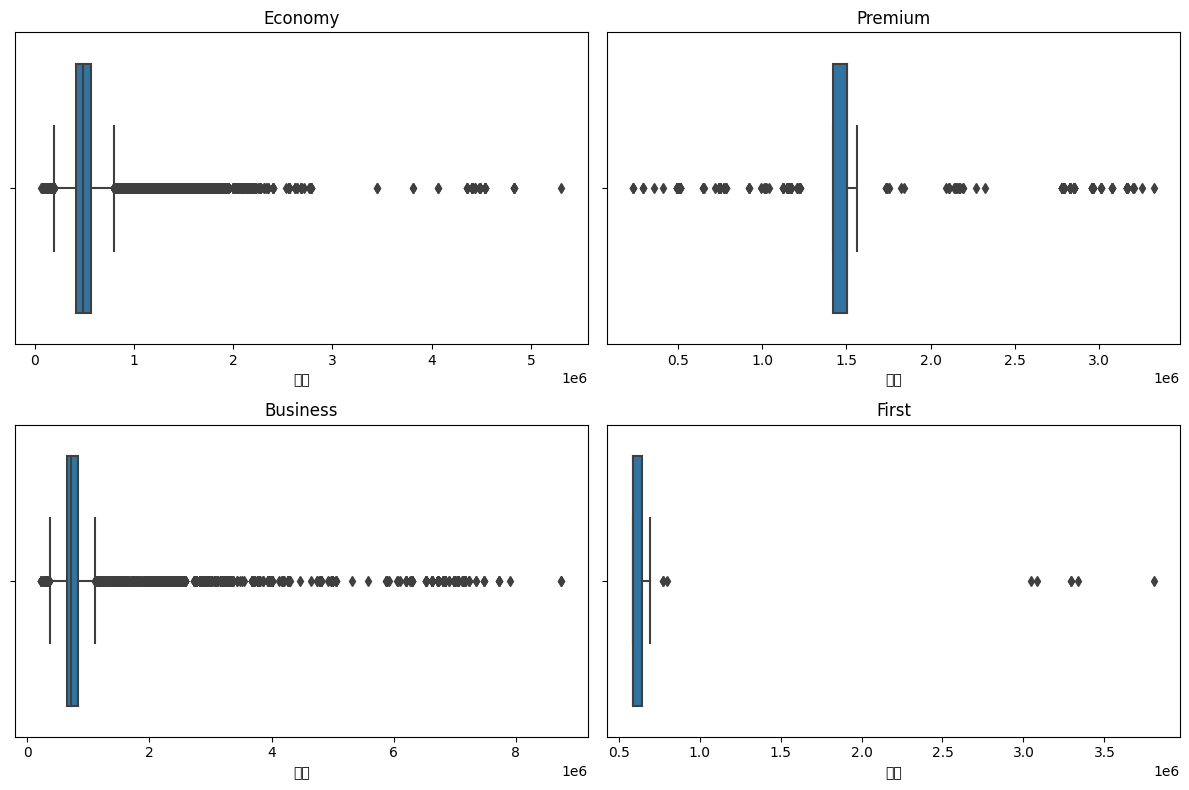

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(x=economy_df['가격'], ax=axs[0, 0])
axs[0, 0].set_title('Economy')

sns.boxplot(x=premium_df['가격'], ax=axs[0, 1])
axs[0, 1].set_title('Premium')

sns.boxplot(x=business_df['가격'], ax=axs[1, 0])
axs[1, 0].set_title('Business')

sns.boxplot(x=first_df['가격'], ax=axs[1, 1])
axs[1, 1].set_title('First')

plt.tight_layout()
plt.show()

In [246]:
economy_df = economy_df[economy_df['가격'] <= 4e6]
premium_df = premium_df[premium_df['가격'] <= 2e6]
business_df = business_df[business_df['가격'] <= 4e6]
first_df = first_df[first_df['가격'] <= 3e6]

In [247]:
data = pd.concat([economy_df, premium_df, business_df, first_df])

In [248]:
# Split the data into features (X) and target variable (y)
X = data.drop('가격', axis=1)
y = data['가격']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor model
rf_model2 = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model2.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = rf_model2.predict(X_test)

# Evaluate the model's performance using R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9066622101630529


In [253]:
grouped = df2.groupby('좌석등급')

In [254]:
economy_df = grouped.get_group(0)
premium_df = grouped.get_group(1)
business_df = grouped.get_group(2)
first_df = grouped.get_group(3)

C:\Users\user\AppData\Local\Temp\ipykernel_8136\3223487170.py:18: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_8136\3223487170.py:18: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  plt.tight_layout()
c:\Users\user\anaconda3\envs\tp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\tp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


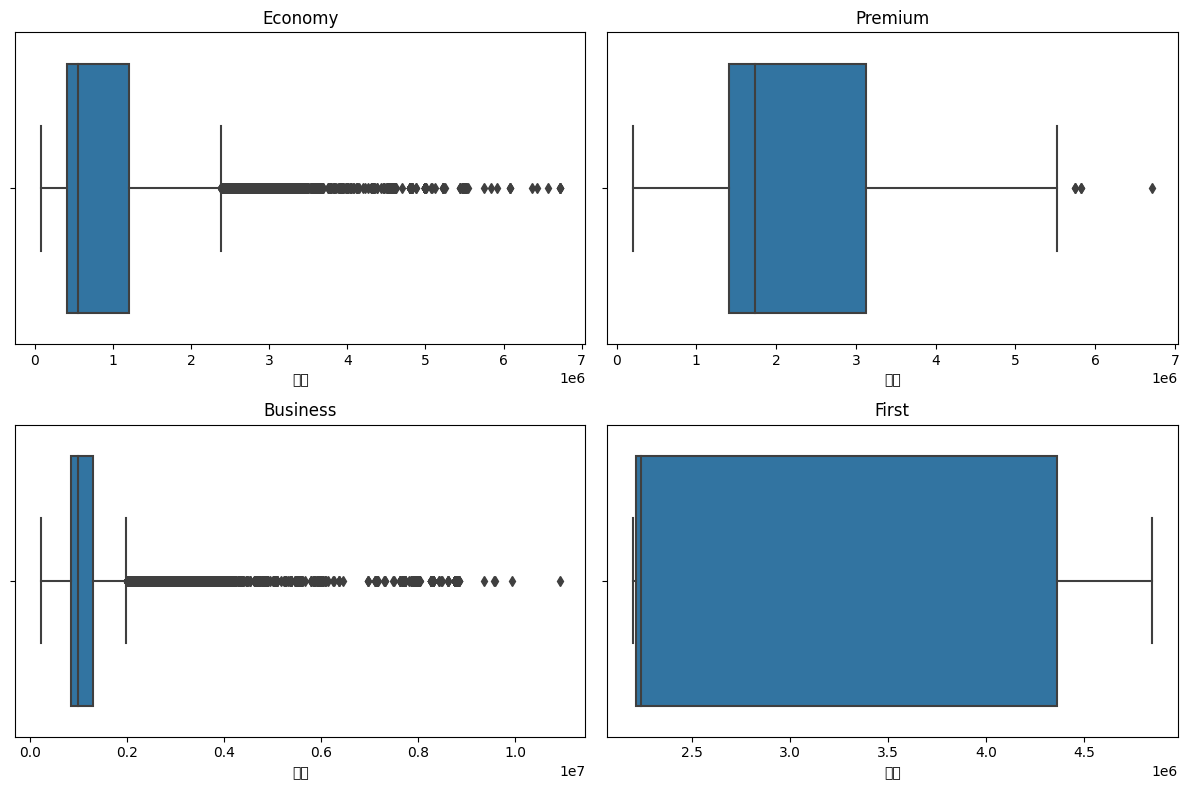

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(x=economy_df['가격'], ax=axs[0, 0])
axs[0, 0].set_title('Economy')

sns.boxplot(x=premium_df['가격'], ax=axs[0, 1])
axs[0, 1].set_title('Premium')

sns.boxplot(x=business_df['가격'], ax=axs[1, 0])
axs[1, 0].set_title('Business')

sns.boxplot(x=first_df['가격'], ax=axs[1, 1])
axs[1, 1].set_title('First')

plt.tight_layout()
plt.show()

In [256]:
economy_df = economy_df[economy_df['가격'] <= 5e7]
premium_df = premium_df[premium_df['가격'] <= 6e7]
business_df = business_df[business_df['가격'] <= 0.8e6]

In [257]:
data = pd.concat([economy_df, premium_df, business_df, first_df])

In [258]:
# Split the data into features (X) and target variable (y)
X = data.drop('가격', axis=1)
y = data['가격']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor model
rf_model2 = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model2.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = rf_model2.predict(X_test)

# Evaluate the model's performance using R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7863836014565572


In [330]:
check_df = pd.read_csv("air_original_k2j.csv",encoding='cp949') # 일본행 데이터 원본
check_df

,Arr,Det,Arr_date,arr_times,Ret_times,time_taken,time_dir,price,grade
0,ICN,KIX,2023-08-20,14:00,16:00,직항,02시간 00분,"편도 169,200원~",economy
1,ICN,KIX,2023-08-20,8:00,9:50,직항,01시간 50분,"편도 175,900원~",economy
2,ICN,KIX,2023-08-20,12:10,14:00,직항,01시간 50분,"편도 175,900원~",economy
3,ICN,KIX,2023-08-20,13:30,15:20,직항,01시간 50분,"편도 181,800원~",economy
4,ICN,KIX,2023-08-20,13:45,15:35,직항,01시간 50분,"편도 188,900원~",economy
...,...,...,...,...,...,...,...,...,...
58064,ICN,HND,2023-09-03,9:05,13:45,경유 1,04시간 40분,"편도 775,700원~",first
58065,ICN,HND,2023-09-03,9:05,13:45,경유 1,04시간 40분,"편도 797,000원~",first
58066,ICN,HND,2023-09-03,12:35,21:20,경유 1,08시간 45분,"편도 3,049,200원~",first
58067,ICN,HND,2023-09-03,12:35,21:20,경유 1,08시간 45분,"편도 3,086,300원~",first


In [331]:
# Assuming df is your DataFrame
check_df.rename(columns={
    'Arr': '출발지',
    'Det': '도착지',
    'Arr_date': '날짜',
    'arr_times': '출발시간',
    'Ret_times': '도착시간',
    'time_taken': '항공편',
    'time_dir': '총 소요 시간',
    'price': '가격',
    'grade': '좌석등급'
}, inplace=True)
check_df

,출발지,도착지,날짜,출발시간,도착시간,항공편,총 소요 시간,가격,좌석등급
0,ICN,KIX,2023-08-20,14:00,16:00,직항,02시간 00분,"편도 169,200원~",economy
1,ICN,KIX,2023-08-20,8:00,9:50,직항,01시간 50분,"편도 175,900원~",economy
2,ICN,KIX,2023-08-20,12:10,14:00,직항,01시간 50분,"편도 175,900원~",economy
3,ICN,KIX,2023-08-20,13:30,15:20,직항,01시간 50분,"편도 181,800원~",economy
4,ICN,KIX,2023-08-20,13:45,15:35,직항,01시간 50분,"편도 188,900원~",economy
...,...,...,...,...,...,...,...,...,...
58064,ICN,HND,2023-09-03,9:05,13:45,경유 1,04시간 40분,"편도 775,700원~",first
58065,ICN,HND,2023-09-03,9:05,13:45,경유 1,04시간 40분,"편도 797,000원~",first
58066,ICN,HND,2023-09-03,12:35,21:20,경유 1,08시간 45분,"편도 3,049,200원~",first
58067,ICN,HND,2023-09-03,12:35,21:20,경유 1,08시간 45분,"편도 3,086,300원~",first


In [332]:
# Assuming you have a DataFrame called 'data'
cols = ['출발지', '도착지']

# Print unique values for each column in 'data'
for col in cols:
    unique_values = check_df[col].unique()
    unique_values.sort()  # Sort the unique values for each column
    print(f"Unique values in '{col}': {unique_values}")

Unique values in '출발지': ['CJJ' 'ICN' 'KWJ' 'PUS' 'TAE']
Unique values in '도착지': ['CTS' 'FUK' 'HND' 'KIX' 'NRT' 'OKA']


In [333]:
display(check_df)


def price_to_int(price_str):

    return int(price_str.replace('편도', '').replace(',', '').replace('원~', '').strip())


check_df['가격'] = check_df['가격'].apply(price_to_int)


def time_to_min(time_str):

    hours, minutes = map(int, time_str.replace('시간', '').replace('분', '').split())

    return hours * 60 + minutes



def dir_to_int(dir_str):
    if dir_str =='직항':
        return 0
    elif dir_str =='경유 1':
        return 1
    else:
        return 2

check_df['총 소요 시간'] = check_df['총 소요 시간'].apply(time_to_min)
check_df['항공편'] = check_df['항공편'].apply(dir_to_int)
display(check_df)


,출발지,도착지,날짜,출발시간,도착시간,항공편,총 소요 시간,가격,좌석등급
0,ICN,KIX,2023-08-20,14:00,16:00,직항,02시간 00분,"편도 169,200원~",economy
1,ICN,KIX,2023-08-20,8:00,9:50,직항,01시간 50분,"편도 175,900원~",economy
2,ICN,KIX,2023-08-20,12:10,14:00,직항,01시간 50분,"편도 175,900원~",economy
3,ICN,KIX,2023-08-20,13:30,15:20,직항,01시간 50분,"편도 181,800원~",economy
4,ICN,KIX,2023-08-20,13:45,15:35,직항,01시간 50분,"편도 188,900원~",economy
...,...,...,...,...,...,...,...,...,...
58064,ICN,HND,2023-09-03,9:05,13:45,경유 1,04시간 40분,"편도 775,700원~",first
58065,ICN,HND,2023-09-03,9:05,13:45,경유 1,04시간 40분,"편도 797,000원~",first
58066,ICN,HND,2023-09-03,12:35,21:20,경유 1,08시간 45분,"편도 3,049,200원~",first
58067,ICN,HND,2023-09-03,12:35,21:20,경유 1,08시간 45분,"편도 3,086,300원~",first


,출발지,도착지,날짜,출발시간,도착시간,항공편,총 소요 시간,가격,좌석등급
0,ICN,KIX,2023-08-20,14:00,16:00,0,120,169200,economy
1,ICN,KIX,2023-08-20,8:00,9:50,0,110,175900,economy
2,ICN,KIX,2023-08-20,12:10,14:00,0,110,175900,economy
3,ICN,KIX,2023-08-20,13:30,15:20,0,110,181800,economy
4,ICN,KIX,2023-08-20,13:45,15:35,0,110,188900,economy
...,...,...,...,...,...,...,...,...,...
58064,ICN,HND,2023-09-03,9:05,13:45,1,280,775700,first
58065,ICN,HND,2023-09-03,9:05,13:45,1,280,797000,first
58066,ICN,HND,2023-09-03,12:35,21:20,1,525,3049200,first
58067,ICN,HND,2023-09-03,12:35,21:20,1,525,3086300,first


In [334]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(check_df[['출발지','도착지']])
check_df[['출발지','도착지']]= encoded_data

# Define a dictionary to map the seat class names to their corresponding numerical codes
seat_class_mapping = {
    'economy': 0,
    'premium': 1,
    'business': 2,
    'first': 3
}

# Use the map() function to apply the mapping to the '좌석 등급' column
check_df['좌석등급'] = check_df['좌석등급'].map(seat_class_mapping)

check_df['날짜'] = check_df['날짜'].astype(str).str.replace('-', '').astype(int)

# check_df['출발시간'] = check_df['출발시간'].str.split(':').str[0].astype(int)
# check_df['도착시간'] = check_df['도착시간'].str.split(':').str[0].astype(int)

# Convert '출발시간' and '도착시간' columns to pandas datetime objects
check_df['출발시간'] = pd.to_datetime(check_df['출발시간'])
check_df['도착시간'] = pd.to_datetime(check_df['도착시간'])

# Extract hour and minute features
check_df['출발시간_시'] = check_df['출발시간'].dt.hour
check_df['출발시간_분'] = check_df['출발시간'].dt.minute
check_df['도착시간_시'] = check_df['도착시간'].dt.hour
check_df['도착시간_분'] = check_df['도착시간'].dt.minute

# Drop the original '출발시간' and '도착시간' columns
check_df = check_df.drop(columns=['출발시간', '도착시간','총 소요 시간'])

check_df

C:\Users\user\AppData\Local\Temp\ipykernel_8136\2091265256.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  check_df['출발시간'] = pd.to_datetime(check_df['출발시간'])
C:\Users\user\AppData\Local\Temp\ipykernel_8136\2091265256.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  check_df['도착시간'] = pd.to_datetime(check_df['도착시간'])


,출발지,도착지,날짜,항공편,가격,좌석등급,출발시간_시,출발시간_분,도착시간_시,도착시간_분
0,1.0,3.0,20230820,0,169200,0,14,0,16,0
1,1.0,3.0,20230820,0,175900,0,8,0,9,50
2,1.0,3.0,20230820,0,175900,0,12,10,14,0
3,1.0,3.0,20230820,0,181800,0,13,30,15,20
4,1.0,3.0,20230820,0,188900,0,13,45,15,35
...,...,...,...,...,...,...,...,...,...,...
58064,1.0,2.0,20230903,1,775700,3,9,5,13,45
58065,1.0,2.0,20230903,1,797000,3,9,5,13,45
58066,1.0,2.0,20230903,1,3049200,3,12,35,21,20
58067,1.0,2.0,20230903,1,3086300,3,12,35,21,20


In [339]:
check_df.to_csv("air_test_data.csv", index=False)

In [335]:
# Split the data into features (X) and target variable (y)
X = check_df.drop('가격', axis=1)
y = check_df['가격']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor model
rf_model3 = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model3.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = rf_model3.predict(X_test)

# Evaluate the model's performance using R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9674245834046792


In [337]:
import joblib
# 학습한 모델을 피클링하여 저장합니다.
joblib.dump(rf_model3, 'air_test.pkl')

['air_test.pkl']